In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
reviews_dataset = pd.read_csv('SentimentReviews.csv')

In [128]:
reviews_dataset.head(5)

,brand,categories,manufacturer,reviews.rating,reviews.text,label,reviews.text_reduce
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,5,i love this album. it's very good. more to the...,positive,i love this album. it's very good. more to the...
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,5,Good flavor. This review was collected as part...,positive,Good flavor. This review was collected as part...
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,5,Good flavor.,positive,Good flavor.
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,1,I read through the reviews on here before look...,negative,I read through the reviews on here before look...
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,1,My husband bought this gel for us. The gel cau...,negative,My husband bought this gel for us. The gel cau...


In [15]:
reviews_dataset.drop(columns=['Unnamed: 0'], inplace=True)

In [16]:
reviews_dataset.head()

,brand,categories,manufacturer,reviews.rating,reviews.text,label,reviews.text_reduce
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,5,i love this album. it's very good. more to the...,positive,i love this album. it's very good. more to the...
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,5,Good flavor. This review was collected as part...,positive,Good flavor. This review was collected as part...
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,5,Good flavor.,positive,Good flavor.
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,1,I read through the reviews on here before look...,negative,I read through the reviews on here before look...
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,1,My husband bought this gel for us. The gel cau...,negative,My husband bought this gel for us. The gel cau...


In [106]:
reviews_dataset.isnull().sum()

brand                  0
categories             0
manufacturer           0
reviews.rating         0
reviews.text           0
label                  0
reviews.text_reduce    0
dtype: int64

In [17]:
reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70867 entries, 0 to 70866
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   brand                70867 non-null  object
 1   categories           70867 non-null  object
 2   manufacturer         70867 non-null  object
 3   reviews.rating       70867 non-null  int64 
 4   reviews.text         70867 non-null  object
 5   label                70867 non-null  object
 6   reviews.text_reduce  70867 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.8+ MB


In [20]:
brand = reviews_dataset['brand'].unique()

In [24]:
print("The Unique Brands present: ")
print(brand)

The Unique Brands present: 
['Universal Music' 'Lundberg' 'K-Y' 'J.R. Watkins' 'AMBI' "Johnson's"
 'Olay' 'Windex' 'Heinz' 'KIND' 'Pantene' 'Aussie' 'Disney' 'CeraVe'
 'Solo Foods' 'Finish' 'Jake And The Neverland Pirates' 'Pearhead'
 'No Brand' 'Neutrogena' 'Meguiars' 'Banana Boat' 'Cetaphil' 'Suave'
 'Bumble Bee' 'Citrus Magic' 'La Tortilla Factory' 'Target.com Use Only'
 'Sea Gull Lighting' 'The Seaweed Bath Co.' 'Way Basics' 'Biokleen'
 'Yes to Carrots' 'Alberto VO5' 'Warner Bros.' 'FOX' 'Progresso' "Herr's"
 'Hawaiian Punch' 'Moom' 'Universal Home Video' 'Holmes' 'Sony Music'
 'Beanitos' 'Baxton Studio' "Nature's Path" 'Lite Source'
 'SLOAN VALVE COMPANY' 'Nearly Natural' 'Toy Story' 'MaraNatha' 'Chex'
 'TRESemme' 'Wagan' 'Creme Of Nature' 'Arrid' 'Eagle Brand' 'Pinaud'
 'Hortense B. Hewitt' 'Canada Dry' 'Baxter of California' 'Ragu' 'Sabra'
 'Pendaflex' "Newman's Own Organics" 'The Honest Company' 'Plano' 'Hoover'
 'Stander' 'Calvin Klein' 'iStarUSA' 'Happy Family' "Udi's" 'BETTE

In [35]:
products = reviews_dataset['categories'].unique()

In [45]:
brand_dataset = reviews_dataset[['brand','categories', 'reviews.rating']]

In [73]:
i = 0
movie_brands = set()
for cat in brand_dataset.categories.values:
    if "Movies" in cat:
        movie_brands.add(brand_dataset.iloc[i].brand)
        i += 1

In [74]:
len(movie_brands)

186

In [75]:
i = 0
pc_brands = set()
for cat in brand_dataset.categories.values:
    if "Personal Care" in cat:
        pc_brands.add(brand_dataset.iloc[i].brand)
        i += 1

In [76]:
len(pc_brands)

99

In [77]:
i = 0
food_brands = set()
for cat in brand_dataset.categories.values:
    if "Food" in cat:
        food_brands.add(brand_dataset.iloc[i].brand)
        i += 1

In [78]:
len(food_brands)

84

In [82]:
brand_dataset.categories.values

array(['Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap',
       'Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes',
       'Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes',
       ...,
       'Personal Care,Eye & Ear Care,Eye Care,Contact Lens Care,Contact Lens Cleaners,Eye Drops,Eye Drops/Artificial Tears For Contacts,Health,Walmart Vision Centers,Vision Centers,Contact Lens Saline Solution,Health & Beauty,Vision Care,Contact Lens Care Solutions,Health Care,Soaking Solutions,Health & Wellness,Contact Lens Solutions,Contact Lens Accessories',
       'Baby,Nursing & Feeding,Breastfeeding,Nursing Covers,Baby Deals,Breastfeeding Care',
       'Movies, Music & Books,Music,Gospel & Christian,Electronic & Dance,See More Genres,Music on CD or Vinyl,Vinyl Records,CDs & Vinyl,Pop,Vocal Pop,Ways To Shop Entertainment,Vinyl,Rock,

In [85]:
i = 0
health_brands = set()
for cat in brand_dataset.categories.values:
    if "Personal Care" and "Health & Beauty" in cat:
        health_brands.add(brand_dataset.iloc[i].brand)
        i += 1

In [86]:
len(health_brands)

84

<AxesSubplot:>

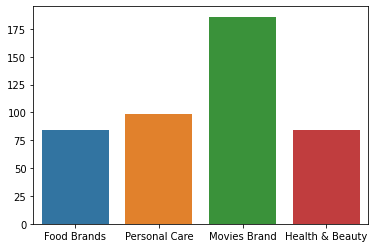

In [87]:
sns.barplot(x = ['Food Brands', 'Personal Care', 'Movies Brand', 'Health & Beauty'], y = [len(food_brands), len(pc_brands), len(movie_brands), len(health_brands)])

In [98]:
good_brands = set()
for k in brand_dataset.values:
    if k[2]>=4:
        good_brands.add(k[0])

In [99]:
len(good_brands)

372

In [102]:
bad_brands = set()
for k in brand_dataset.values:
    if k[2]<=2 and k[2]>=1:
        bad_brands.add(k[0])

In [103]:
len(bad_brands)

209

In [105]:
print("The brands which have both good and bad product reviews rating")
print(good_brands.intersection(bad_brands))

The brands which have both good and bad product reviews rating
{'Tai Pei', 'UNIVERSAL STUDIOS HOME ENTERT.', 'Trend Lab', 'Trend', 'Kenroy Home', 'Queen Helene', "Physician's Formula", 'Baby Banana', 'Olly', 'Yes to Grapefruit', "Snyder's of Hanover", 'Bedtime Originals', 'Cuisinart', 'Feit', 'Storkcraft', 'OxiClean', 'Conair', 'Rubbermaid Lock-Its', 'Tide', 'Arrid', 'Roommates', 'Bengay', 'Mars', 'Kraus', 'Almay', 'Progresso', "L'oreal Paris", 'Foodsaver', 'Summit Entertainment', 'Meguiars', 'J.R. Watkins', 'Iman', 'Early California', 'Attwood', 'Biore', 'Sally Hansen', 'Sc252nci', 'Maybelline', 'International Delight', 'Sony Pictures', 'Nojo', 'Moom', "Mrs. Meyer's", 'J.a. Henckels', 'Cheetos', 'Cetaphil', 'Quilted Northern', 'Coty', 'Clorox', 'Hawaiian Punch', "STACY'S", 'Swann', 'Solo Foods', 'Finish', 'Bumble Bee', 'Holmes', 'Mill Creek', 'Vicks', 'Plano', 'Lionsgate Home Entertainment', 'Head & Shoulders', 'Nourish Organic', 'Biotene', 'American Atelier', 'CeraVe', 'Chobani', 'Cr

In [115]:
ratings = dict(brand_dataset['reviews.rating'].value_counts())

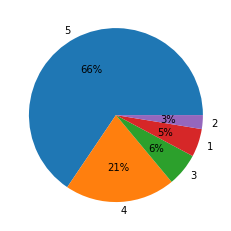

In [124]:
plt.pie(list(ratings.values()), labels=list(ratings.keys()), autopct='%.0f%%')
plt.show()

In [120]:
ratings.values()

dict_values([46451, 14537, 4350, 3699, 1830])